# Gradient Descent Methods

This tour explores the use of gradient descent method for unconstrained and constrained optimization of a smooth function

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$


In [4]:
library(imager)
library(png)
library(pracma)

source("nt_toolbox/general.R")
source("nt_toolbox/signal.R")


Attaching package: ‘pracma’

The following objects are masked from ‘package:magrittr’:

    and, mod, or



## Gradient Descent for Unconstrained Problems

We consider the problem of finding a minimum of a function $f$, hence solving
$$\umin{x \in \RR^d} f(x)$$
where $f : \RR^d \rightarrow \RR$ is a smooth function.

Note that the minimum is not necessarily unique.
In the general case, $f$ might exhibit local minima, in which case the proposed algorithms is not expected to find a global minimizer of the problem.
In this tour, we restrict our attention to convex function, so that the methods will converge to a global minimizer.

The simplest method is the gradient descent, that computes
$$ x^{(k+1)} = x^{(k)} - \tau_k \nabla f(x^{(k)}), $$
where $\tau_k>0$ is a step size, and $\nabla f(x) \in \RR^d$ is the gradient of $f$ at the point $x$, and $x^{(0)} \in \RR^d$ is any initial point.

In the convex case, if $f$ is of class $C^2$, in order to ensure convergence, the step size should satisfy
$$ 0 < \tau_k < \frac{2}{ \sup_x \norm{Hf(x)} } $$
where $Hf(x) \in \RR^{d \times d}$ is the Hessian of $f$ at $x$ and $\norm{\cdot}$ is the spectral operator norm (largest eigenvalue). 

## Gradient Descent in 2-D

We consider a simple problem, corresponding to the minimization of a 2-D quadratic form
$$ f(x) = \frac{1}{2} \pa{ x_1^2 + \eta x_2^2 } ,$$
where $\eta>0$ controls the anisotropy, and hence the difficulty, of the problem.

Anisotropy parameter $\eta$.

In [5]:
eta = 10

Function $f$.

In [6]:
f = function(x) {(x[0,0]**2 + eta*x[1,0]**2 ) / 2}

Background image of the function.

In [7]:
t = linspace(-.7,.7,101)
temp = meshgrid(t,t)
x = temp$X
y = temp$Y
F = ( x ** 2 + eta * y ** 2 ) / 2

Display the function as a 2-D image.

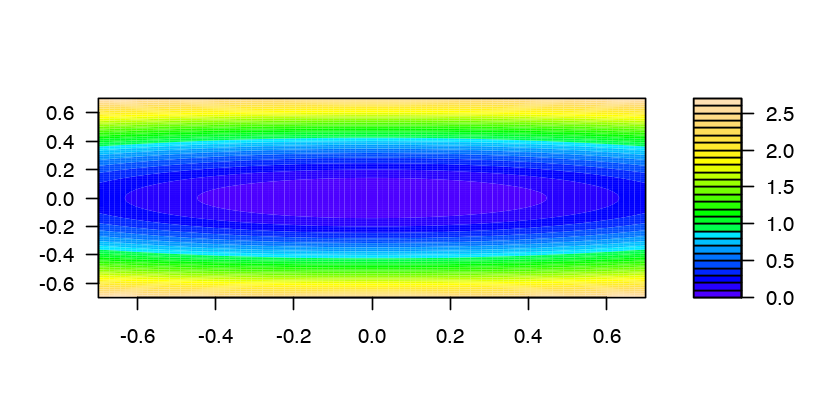

In [8]:
options(repr.plot.width=7, repr.plot.height=3.5)
filled.contour(t,t,t(F),nlevels=35, color.palette=topo.colors)

Gradient.

In [9]:
GradF = function(x) {c(x[0,0], eta*x[1,0])}

The step size should satisfy $\tau_k < 2/\eta$.
We use here a constant step size.

In [10]:
tau = 1.8/eta

_Exercice 1:_
Perform the gradient descent using a fixed step size $\tau_k=\tau$.
Display the decay of the energy $f(x^{(k)})$ through the iteration.
Save the iterates so that |X(:,k)| corresponds to $x^{(k)}$.

In [11]:
## Insert your code here.

Display the iterations.

In [30]:
#contourf(t,t,Jmesh,35)
#plot(X[0,:], X[1,:], 'k.-')

Display the iteration for several different step sizes.

In [31]:
## Insert your code here.

## Gradient and Divergence of Images

Local differential operators like gradient, divergence and laplacian are the building blocks for variational image processing.

Load an image $x_0 \in \RR^N$ of $N=n \times n$ pixels.

In [32]:
n = 256
name = 'nt_toolbox/data/lena.png'
x0 = load_image(name, n)

Display it.

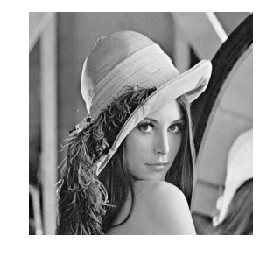

In [33]:
imageplot(x0)

For a continuous function $g$, the gradient reads
$$\nabla g(s) = \pa{ \pd{g(s)}{s_1}, \pd{g(s)}{s_2} } \in \RR^2.$$
(note that here, the variable $d$ denotes the 2-D spacial position).

We discretize this differential operator on a discrete image $x \in \RR^N$ using first order finite differences. 
$$(\nabla x)_i = ( x_{i_1,i_2}-x_{i_1-1,i_2}, x_{i_1,i_2}-x_{i_1,i_2-1} ) \in \RR^2.$$
Note that for simplity we use periodic boundary conditions.

Compute its gradient, using finite differences.

In [34]:
def grad(x):
    hdiff = x - x[r_[len(x)-1,:len(x)-1],:]
    vdiff = x - x[:,r_[len(x)-1,:len(x)-1]]
    return concatenate((hdiff[...,newaxis],vdiff[...,newaxis]),axis=2)

One thus has $\nabla : \RR^N \mapsto \RR^{N \times 2}.$

In [35]:
v = grad(x0)

One can display each of its components.

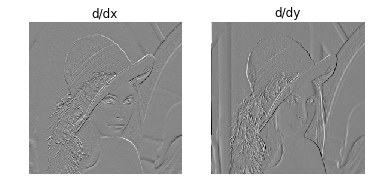

In [36]:
imageplot(v[:,:,0], 'd/dx', (1,2,1))
imageplot(v[:,:,1], 'd/dy', (1,2,2))

One can display its magnitude $\norm{(\nabla x)_i}$, which is large near edges.

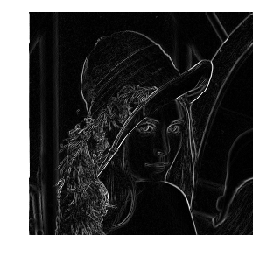

In [37]:
imageplot(sqrt(sum(v * v,axis=2)))

The divergence operator maps vector field to images. 
For continuous vector fields \(v(s) \in \RR^2\), it is defined as
$$\text{div}(v)(s) = \pd{v_1(s)}{s_1} +  \pd{v_2(s)}{s_2} \in \RR.$$
(note that here, the variable \(s\) denotes the 2-D spacial position).
It is minus the adjoint of the gadient, i.e. $\text{div} = - \nabla^*$.

It is discretized, for $v=(v^1,v^2)$ as
$$\text{div}(v)_i = v^1_{i_1+1,i_2} - v^1_{i_1,i_2} + v^2_{i_1,i_2+1} - v^2_{i_1,i_2} .$$

In [38]:
div = lambda x : x[r_[1:len(x),0],:,0] - x[:,:,0] + x[:,r_[1:len(x),0],1] - x[:,:,1]

The Laplacian operatore is defined as $\Delta=\text{div} \circ  \nabla = -\nabla^* \circ \nabla$.
It is thus a negative symmetric operator.

In [39]:
delta = lambda x : div(grad(x))

Display $\Delta x_0$.

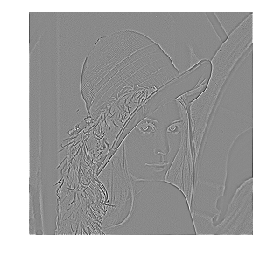

In [40]:
imageplot(delta(x0))

Check that the relation $\norm{\nabla x} = - \dotp{\Delta x}{x}.$

In [41]:
print('Should be 0:\n', (grad(x0) * grad(x0)).sum() + (delta(x0) * x0).sum() )

Should be 0:
 6.18456397206e-11


## Gradient Descent in Image Processing

We consider now the problem of denoising an image $y \in \RR^d$ where $d = n \times n$ is the number of pixels ($n$ being the number of rows/columns in the image).

Add noise to the original image, to simulate a noisy image.

In [42]:
sigma = 0.1
y = x0 + sigma * randn(n,n)

Display the noisy image $y$.

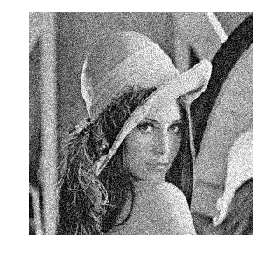

In [43]:
imageplot(clamp(y))

Denoising is obtained by minimizing the following functional
$$\umin{x \in \RR^d} f(x) = \frac{1}{2} \norm{y-x}^2 + \la J_\epsilon(x)$$
where $J_\epsilon(x)$ is a smoothed total variation of the image.
$$J_\epsilon(x) = \sum_i \norm{ (G x)_i }_{\epsilon}$$
where $(Gx)_i \in \RR^2$ is an approximation of the gradient of $x$ at pixel $i$ and for $u \in \RR^2$, we use the following smoothing of the $L^2$ norm in $\RR^2$
$$\norm{u}_\epsilon = \sqrt{ \epsilon^2 + \norm{u}^2 },$$
for a small value of $\epsilon>0$.

The gradient of the functional read
$$\nabla f(x) = x-y + \lambda \nabla J_\epsilon(x)$$
where the gradient of the smoothed TV norm is
$$\nabla J_\epsilon(x)_i = G^*( u ) \qwhereq u_i = \frac{ (G x)_i }{\norm{ (G x)_i }_\epsilon} $$
where $G^*$ is the adjoint operator of $G$ which corresponds to minus a discretized divergence

Value for $\lambda$.

In [44]:
la = 0.3 / 5

Value for $\epsilon$.

In [45]:
epsilon = 1e-3

TV norm.

In [46]:
norm_eps = lambda u : sqrt(eps**2 + sum(u * u, axis=2))
J = lambda x : sum(sum(norm_eps(grad(x))))

Function $f$ to minimize.

In [47]:
f = lambda x : 1/2 * norm(x-y)**2 + la * J(x)

Gradient of $J_\epsilon$. Note that |div| implement $-G^*$.

In [48]:
normalize_vec = lambda u : u / tile(norm_eps(u)[...,newaxis], (1, 1, 2))
gradTV = lambda x : - divergence(normalize_vec(grad(x)))

Gradient of the functional.

In [49]:
Gradf = lambda x : x - y + la * gradTV(x)

The step size should satisfy
$$0 < \tau_k < \frac{2}{ 1 + 4 \lambda / \epsilon }.$$
Here we use a slightly larger step size, which still work in practice.

In [50]:
tau = 1.8/( 1 + la*8/epsilon )
tau = tau*4

_Exercice 3:_
Implement the gradient descent. Monitor the decay of $f$ through the iterations.

In [51]:
## Insert your code here.

Display the resulting denoised image.

In [52]:
#imageplot(clamp(x))

## Constrained Optimization Using Projected Gradient Descent

We consider a linear imaging operator $\Phi : x \mapsto \Phi(x)$ that maps high resolution images to low dimensional observations.
Here we consider a pixel masking operator, that is diagonal over the spacial domain.

To emphasis the effect of the TV functional, we use a simple geometric image.

In [53]:
n = 64
radius = 0.6
t = linspace(-1,1,n)
[Y,X] = meshgrid(t,t)
x0 = (maximum( abs(X),abs(Y) ) < radius) * 1.0

We consider here the inpainting problem.
This simply corresponds to a masking operator.
Here we remove the central part of the image.

In [54]:
a = 4
Lambda = ones((n,n))
Lambda[n/2-a:n/2+a,:] = 0

Masking operator $\Phi$.
Note that it is symmetric, i.e. $\Phi^*=\Phi$.

In [55]:
Phi  = lambda x : x * Lambda
PhiS = Phi 

Noiseless observations $y=\Phi x_0$.

In [56]:
y = Phi(x0)

Display.

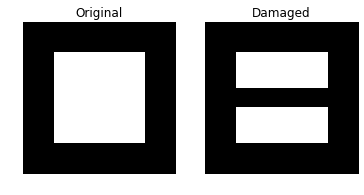

In [57]:
imageplot(x0, 'Original', (1,2,1))
imageplot(y, 'Damaged', (1,2,2))

We want to solve the noiseless inverse problem $y=\Phi f$ using a total variation regularization:
$$\umin{ y=\Phi x } J_\epsilon(x).$$
We use the following projected gradient descent
$$x^{(k+1)} = \text{Proj}_{\Hh}( x^{(k)} - \tau_k \nabla J_{\epsilon}(x^{(k)}) )$$
where $\text{Proj}_{\Hh}$ is the orthogonal projection on the set of linear constraint $\Phi x = y$, and is easy to compute for inpainting

In [58]:
ProjH = lambda x : x + PhiS( y - Phi(x) )

_Exercice 4:_
Display the evolution of the inpainting process.

In [59]:
## Insert your code here.

_Exercice 5:_
Try with several values of $\epsilon$.

In [60]:
## Insert your code here.